In [194]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn import tree, linear_model, datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, LeaveOneOut, LeavePOut, ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier





In [9]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

mean = np.mean(speed)  
median = np.median(speed)
mode = stats.mode(speed)

print(f'Mean is {mean}, Median is {median}, Mode is {mode.mode}')

standard_deviation = np.std(speed)
variance = np.var(speed)

print(f'Standard Deviation is {standard_deviation}, Variance is {variance}')

Mean is 89.76923076923077, Median is 87.0, Mode is 86
Standard Deviation is 9.258292301032677, Variance is 85.71597633136093


In [10]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

percentile_25 = np.percentile(ages, 25)
percentile_50 = np.percentile(ages, 50)
percentile_75 = np.percentile(ages, 75)

print(f'25 Percentile is {percentile_25}, 50 Percentile is {percentile_50}, 75 Percentile is {percentile_75}')


25 Percentile is 11.0, 50 Percentile is 31.0, 75 Percentile is 43.0


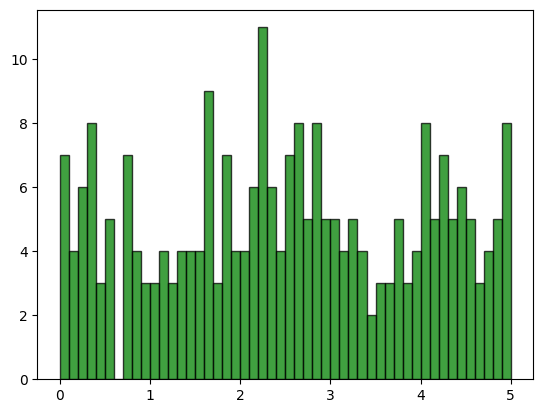

In [20]:
x = np.random.uniform(0.0, 5.0, 250)

plt.hist(x, 50, facecolor='g', alpha=0.75, label='Histogram', edgecolor='black')
plt.show()

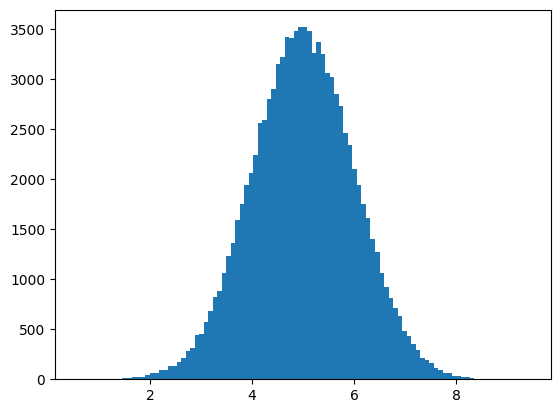

In [21]:
x = np.random.normal(5.0, 1.0, 100000)

plt.hist(x, 100)
plt.show()

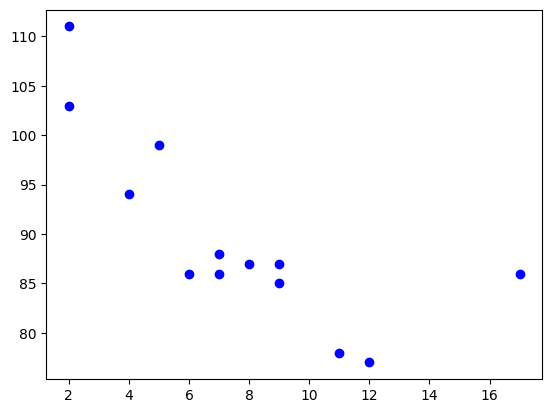

In [25]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y, color='blue')
plt.show()

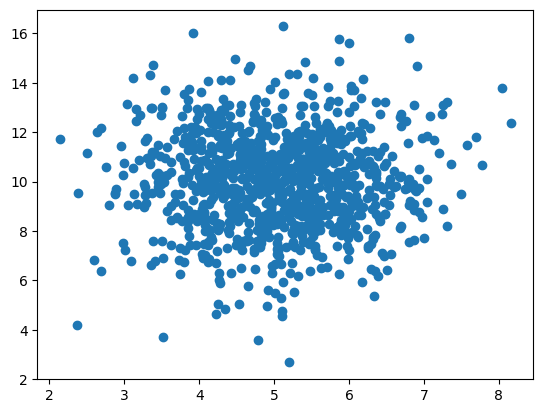

In [27]:
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

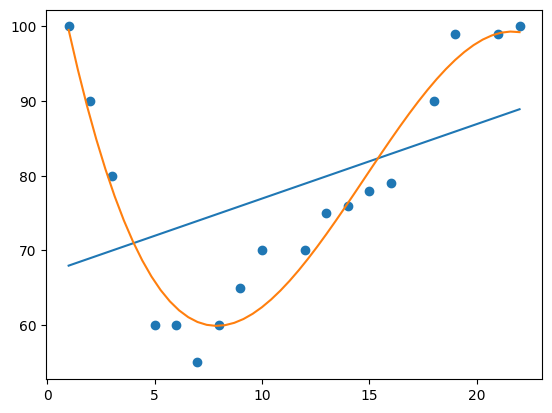

In [49]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def lr(x):
  return slope * x + intercept

linear_model = list(map(lr, x))
poly_model = np.poly1d(np.polyfit(x, y, 3))
poly_line = np.linspace(1, 22, 50)
plt.scatter(x, y)
plt.plot(x, linear_model)
plt.plot(poly_line, poly_model(poly_line))

plt.show()

In [51]:
speed = poly_model(17)
print(speed)

88.87331269698001


In [68]:
df = pd.read_csv("data.csv")

df.head()

,Car,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [54]:
X = df[['Weight', 'Volume']]
y = df['CO2']

In [56]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [59]:
predictedCO2 = regr.predict([[2300, 1300]])
print(predictedCO2)

[107.2087328]


c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
print(regr.coef_)

[0.00755095 0.00780526]


In [69]:
scale = StandardScaler()
df = pd.read_csv("data.csv")

X = df[['Weight', 'Volume']]

scaledX = scale.fit_transform(X)

print(scaledX)

[[-2.10389253 -1.59336644]
 [-0.55407235 -1.07190106]
 [-1.52166278 -1.59336644]
 [-1.78973979 -1.85409913]
 [-0.63784641 -0.28970299]
 [-1.52166278 -1.59336644]
 [-0.76769621 -0.55043568]
 [ 0.3046118  -0.28970299]
 [-0.7551301  -0.28970299]
 [-0.59595938 -0.0289703 ]
 [-1.30803892 -1.33263375]
 [-1.26615189 -0.81116837]
 [-0.7551301  -1.59336644]
 [-0.16871166 -0.0289703 ]
 [ 0.14125238 -0.0289703 ]
 [ 0.15800719 -0.0289703 ]
 [ 0.3046118  -0.0289703 ]
 [-0.05142797  1.53542584]
 [-0.72580918 -0.0289703 ]
 [ 0.14962979  1.01396046]
 [ 1.2219378  -0.0289703 ]
 [ 0.5685001   1.01396046]
 [ 0.3046118   1.27469315]
 [ 0.51404696 -0.0289703 ]
 [ 0.51404696  1.01396046]
 [ 0.72348212 -0.28970299]
 [ 0.8281997   1.01396046]
 [ 1.81254495  1.01396046]
 [ 0.96642691 -0.0289703 ]
 [ 1.72877089  1.01396046]
 [ 1.30990057  1.27469315]
 [ 1.90050772  1.01396046]
 [-0.23991961 -0.0289703 ]
 [ 0.40932938 -0.0289703 ]
 [ 0.47215993 -0.0289703 ]
 [ 0.4302729   2.31762392]]


In [67]:
df = pd.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

scaledX = scale.fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

[97.07204485]


c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


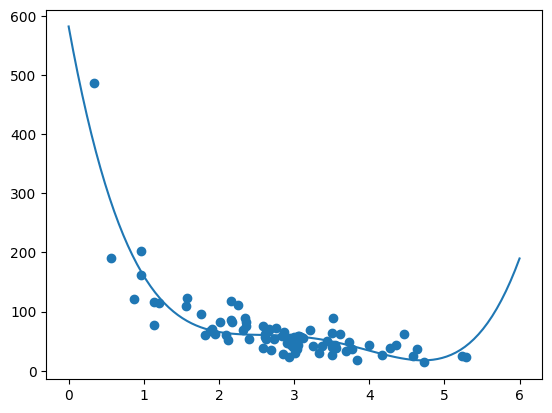

In [70]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [72]:
r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.7988645544629797


In [80]:
x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.6210794247283533


In [81]:
print(mymodel(1))

136.77738976244802


In [83]:
df = pd.read_csv("dtdata.csv")
df.head()

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES


In [84]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

In [85]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

[Text(0.2857142857142857, 0.9, 'Rank <= 6.5\ngini = 0.497\nsamples = 13\nvalue = [6, 7]'),
 Text(0.14285714285714285, 0.7, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.42857142857142855, 0.7, 'Rank <= 8.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5714285714285714, 0.5, 'Age <= 35.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.42857142857142855, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7142857142857143, 0.3, 'Experience <= 9.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5714285714285714, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8571428571428571, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

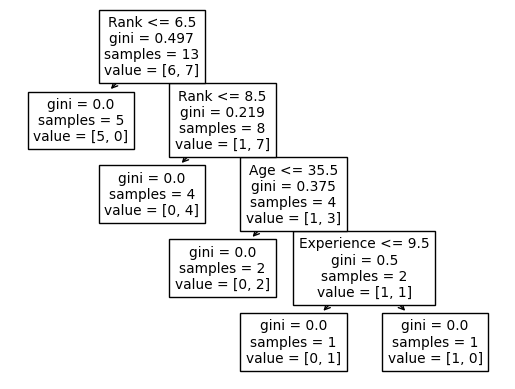

In [87]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

In [89]:
actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

In [97]:
confusion_matrixx = confusion_matrix(actual, predicted)

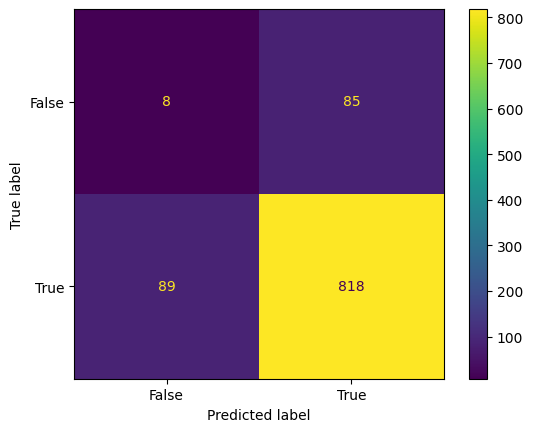

In [98]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrixx, display_labels = [False, True])

cm_display.plot()
plt.show()

In [104]:
Accuracy = accuracy_score(actual, predicted)
Percision = precision_score(actual, predicted)
Recall = recall_score(actual, predicted)
F1_score = f1_score(actual, predicted)
Accuracy, Percision, Recall, F1_score

(0.826, 0.9058693244739756, 0.9018743109151047, 0.9038674033149171)

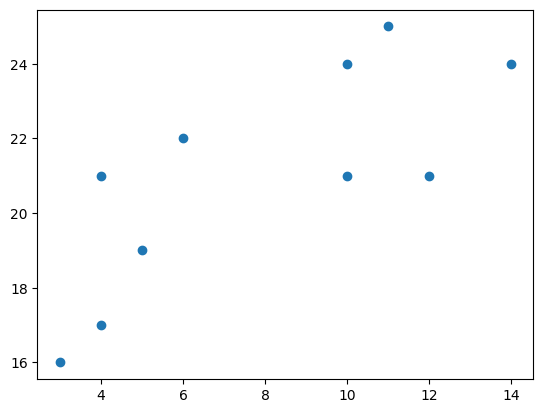

In [105]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

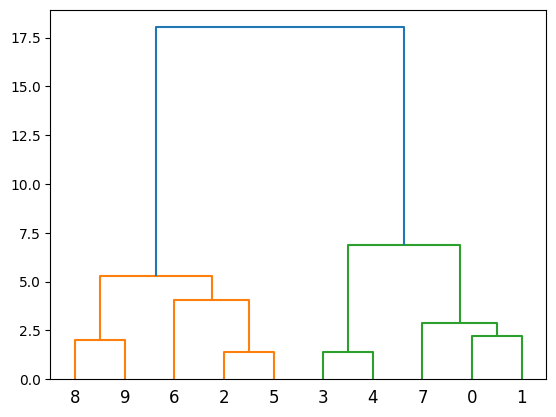

In [107]:
data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


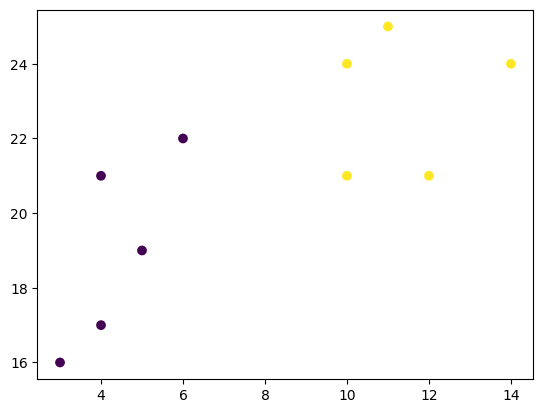

In [109]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

In [114]:
X = np.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

LogisticRegression()

In [115]:
predicted = logr.predict(np.array([3.46]).reshape(-1,1))

print(predicted)

[0]


In [116]:
log_odds = logr.coef_
odds = np.exp(log_odds)

print(odds)

[[4.03541657]]


In [118]:
def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

In [120]:

print(logit2prob(logr, X))



[[0.60749955]
 [0.19268876]
 [0.12775886]
 [0.00955221]
 [0.08038616]
 [0.07345637]
 [0.88362743]
 [0.77901378]
 [0.88924409]
 [0.81293497]
 [0.57719129]
 [0.96664243]]


In [123]:
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)



In [124]:
print(logit.fit(X,y))

LogisticRegression(max_iter=10000)


In [125]:
print(logit.score(X,y))



0.9733333333333334


In [129]:
C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 3, 23]
scores = []


for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)



[0.9666666666666667, 0.9666666666666667, 0.9733333333333334, 0.9733333333333334, 0.98, 0.98, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.98]


In [130]:
cars = pd.read_csv('data.csv')
print(cars.to_string())

           Car       Model  Volume  Weight  CO2
0       Toyoty        Aygo    1000     790   99
1   Mitsubishi  Space Star    1200    1160   95
2        Skoda      Citigo    1000     929   95
3         Fiat         500     900     865   90
4         Mini      Cooper    1500    1140  105
5           VW         Up!    1000     929  105
6        Skoda       Fabia    1400    1109   90
7     Mercedes     A-Class    1500    1365   92
8         Ford      Fiesta    1500    1112   98
9         Audi          A1    1600    1150   99
10     Hyundai         I20    1100     980   99
11      Suzuki       Swift    1300     990  101
12        Ford      Fiesta    1000    1112   99
13       Honda       Civic    1600    1252   94
14      Hundai         I30    1600    1326   97
15        Opel       Astra    1600    1330   97
16         BMW           1    1600    1365   99
17       Mazda           3    2200    1280  104
18       Skoda       Rapid    1600    1119  104
19        Ford       Focus    2000    13

In [131]:
ohe_cars = pd.get_dummies(cars[['Car']])

In [132]:
print(ohe_cars.to_string())


    Car_Audi  Car_BMW  Car_Fiat  Car_Ford  Car_Honda  Car_Hundai  Car_Hyundai  Car_Mazda  Car_Mercedes  Car_Mini  Car_Mitsubishi  Car_Opel  Car_Skoda  Car_Suzuki  Car_Toyoty  Car_VW  Car_Volvo
0      False    False     False     False      False       False        False      False         False     False           False     False      False       False        True   False      False
1      False    False     False     False      False       False        False      False         False     False            True     False      False       False       False   False      False
2      False    False     False     False      False       False        False      False         False     False           False     False       True       False       False   False      False
3      False    False      True     False      False       False        False      False         False     False           False     False      False       False       False   False      False
4      False    False     False    

In [134]:
X = pd.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

In [135]:
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression()

In [136]:
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

print(predictedCO2)

[122.45153299]


c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [137]:
colors = pd.DataFrame({'color': ['blue', 'red']})
dummies = pd.get_dummies(colors, drop_first=True)

In [142]:
colors = pd.DataFrame({'color': ['blue', 'red', 'green']})
dummies = pd.get_dummies(colors, drop_first=True)
dummies['color'] = colors['color']

print(dummies)

   color_green  color_red  color
0        False      False   blue
1        False       True    red
2         True      False  green


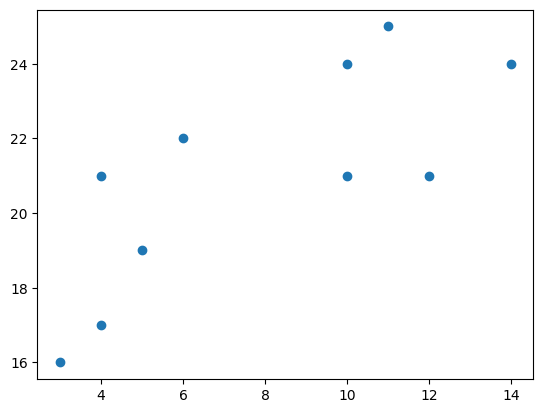

In [143]:
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

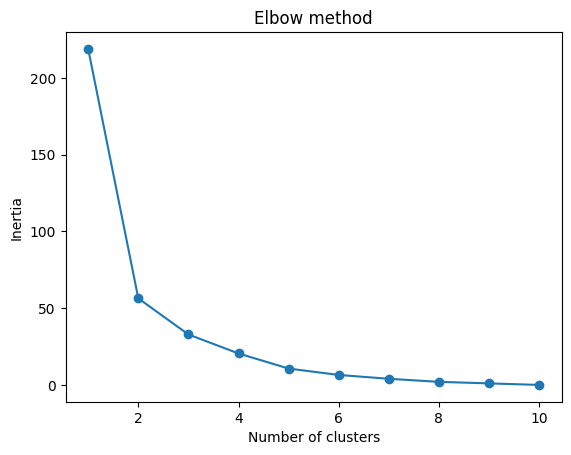

In [145]:
data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

c:\Users\arian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


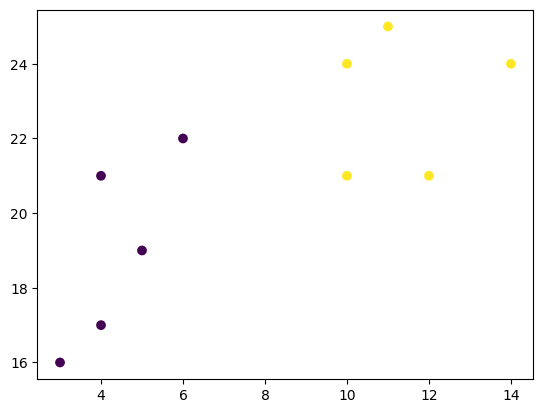

In [149]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [150]:
data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)



In [154]:
dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=22)

In [155]:
DecisionTreeClassifier(random_state=22)



DecisionTreeClassifier(random_state=22)

In [156]:
y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


In [158]:
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

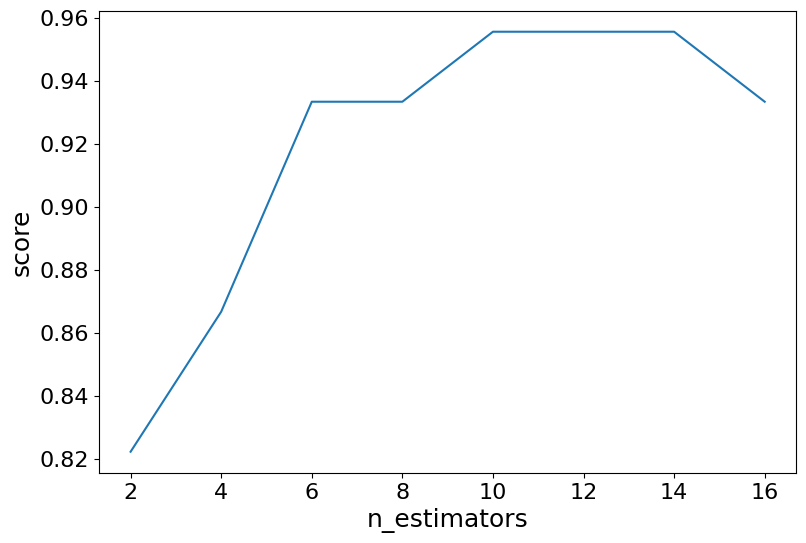

In [159]:
# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [165]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

oob_model = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9398496240601504


In [174]:
X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1.         1.         0.83333333 0.93333333 0.8       ]
Average CV Score:  0.9133333333333333
Number of CV Scores used in Average:  5


In [176]:
X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average CV Score:  0.9533333333333334
Number of CV Scores used in Average:  5


In [178]:
X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Average CV Score:  0.94
Number of CV Scores used in Average:  150


In [180]:
X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [1. 1. 1. ... 1. 1. 1.]
Average CV Score:  0.9382997762863534
Number of CV Scores used in Average:  11175


In [182]:
X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.97777778 0.95555556 0.97777778 0.97777778 0.95555556]
Average CV Score:  0.9688888888888888
Number of CV Scores used in Average:  5


In [184]:
n = 10000
ratio = .95
n_0 = int((1-ratio) * n)
n_1 = int(ratio * n)

y = np.array([0] * n_0 + [1] * n_1)
# below are the probabilities obtained from a hypothetical model that always predicts the majority class
# probability of predicting class 1 is going to be 100%
y_proba = np.array([1]*n)
y_pred = y_proba > .5

print(f'accuracy score: {accuracy_score(y, y_pred)}')
cf_mat = confusion_matrix(y, y_pred)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.95
Confusion matrix
[[   0  500]
 [   0 9500]]
class 0 accuracy: 0.0
class 1 accuracy: 1.0


In [185]:
# below are the probabilities obtained from a hypothetical model that doesn't always predict the mode
y_proba_2 = np.array(
    np.random.uniform(0, .7, n_0).tolist() +
    np.random.uniform(.3, 1, n_1).tolist()
)
y_pred_2 = y_proba_2 > .5

print(f'accuracy score: {accuracy_score(y, y_pred_2)}')
cf_mat = confusion_matrix(y, y_pred_2)
print('Confusion matrix')
print(cf_mat)
print(f'class 0 accuracy: {cf_mat[0][0]/n_0}')
print(f'class 1 accuracy: {cf_mat[1][1]/n_1}')

accuracy score: 0.7079
Confusion matrix
[[ 345  155]
 [2766 6734]]
class 0 accuracy: 0.69
class 1 accuracy: 0.7088421052631579


In [186]:
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.5


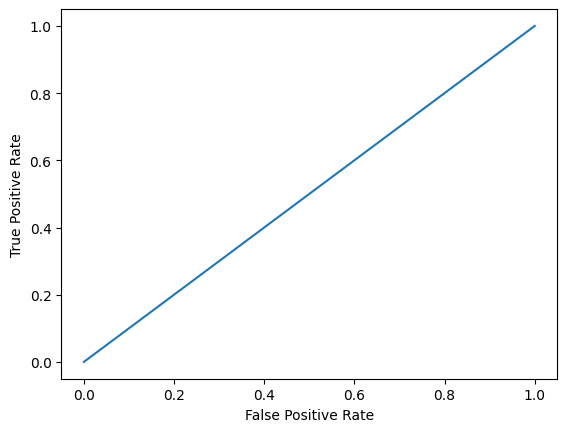

In [187]:
plot_roc_curve(y, y_proba)
print(f'model 1 AUC score: {roc_auc_score(y, y_proba)}')

model 2 AUC score: 0.8322555789473683


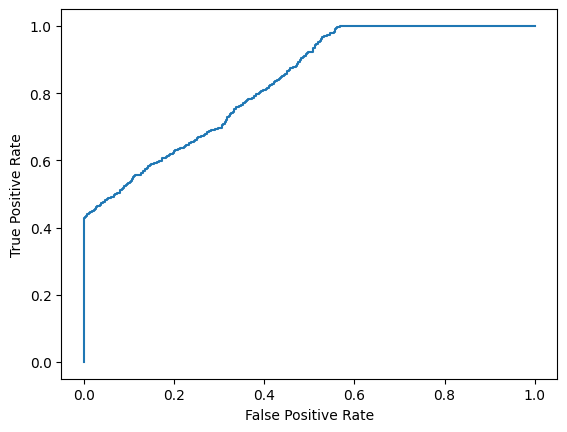

In [188]:
plot_roc_curve(y, y_proba_2)
print(f'model 2 AUC score: {roc_auc_score(y, y_proba_2)}')

model 1 accuracy score: 0.74935
model 2 accuracy score: 0.74835
model 1 AUC score: 0.7734236099999999
model 2 AUC score: 0.85921867


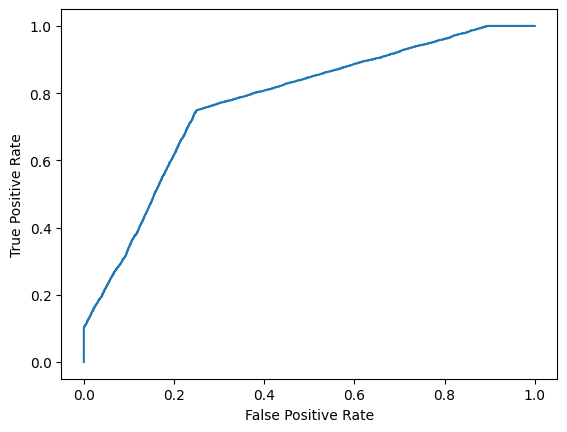

In [190]:
n = 10000
y = np.array([0] * n + [1] * n)
#
y_prob_1 = np.array(
    np.random.uniform(.25, .5, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.5, .75, n//2).tolist()
)
y_prob_2 = np.array(
    np.random.uniform(0, .4, n//2).tolist() +
    np.random.uniform(.3, .7, n).tolist() +
    np.random.uniform(.6, 1, n//2).tolist()
)

print(f'model 1 accuracy score: {accuracy_score(y, y_prob_1>.5)}')
print(f'model 2 accuracy score: {accuracy_score(y, y_prob_2>.5)}')

print(f'model 1 AUC score: {roc_auc_score(y, y_prob_1)}')
print(f'model 2 AUC score: {roc_auc_score(y, y_prob_2)}')

plot_roc_curve(y, y_prob_1)


[           inf 9.99977410e-01 6.99887227e-01 ... 3.00081409e-01
 3.00079807e-01 5.08068094e-05]


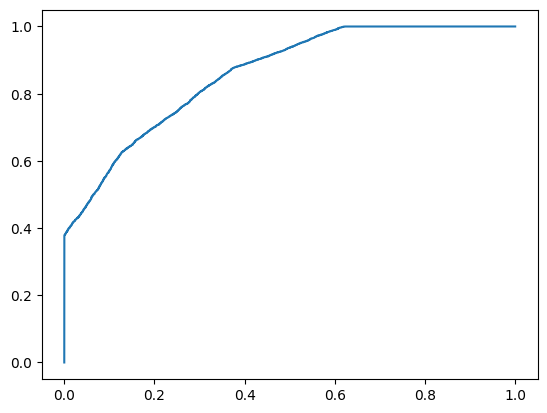

In [192]:
fpr, tpr, thresholds = roc_curve(y, y_prob_2)
plt.plot(fpr, tpr)

print(thresholds)

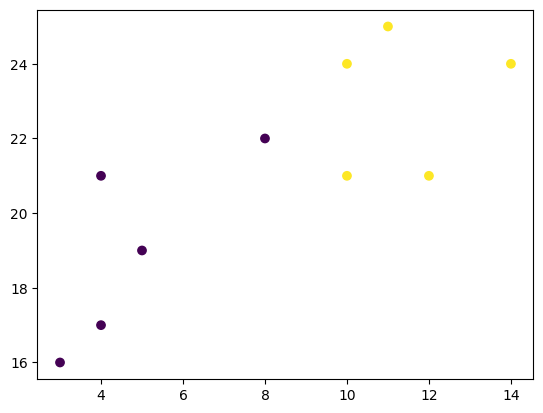

In [193]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

In [195]:
data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

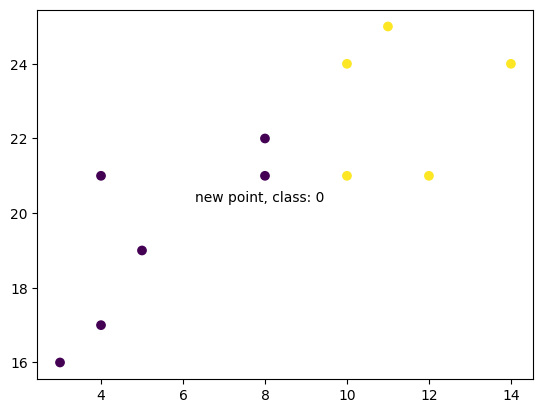

In [196]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

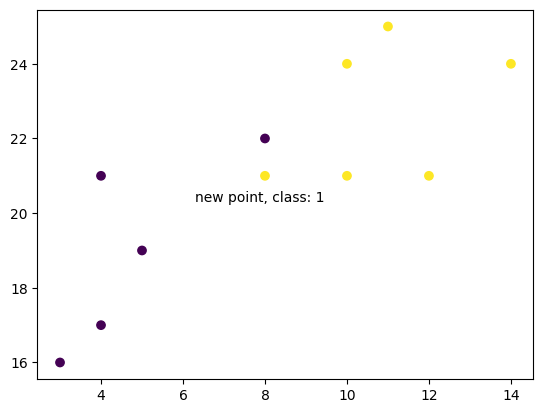

In [197]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

In [198]:
x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

In [199]:
data = list(zip(x, y))
print(data)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


In [200]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(data, classes)

KNeighborsClassifier(n_neighbors=1)

In [201]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]
prediction = knn.predict(new_point)
print(prediction)

[0]


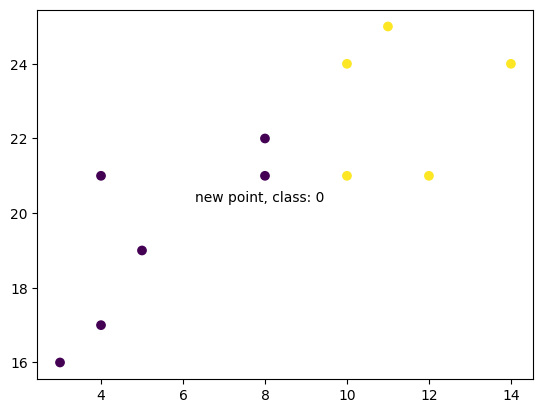

In [202]:
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

In [203]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
prediction = knn.predict(new_point)
print(prediction)

[1]


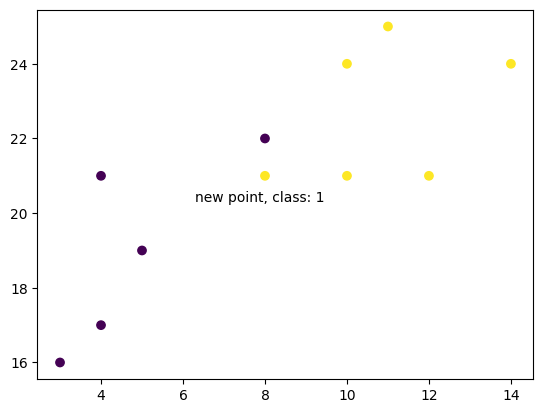

In [204]:
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()